#Raíces de ecuaciones: Métodos cerrados


In [3]:
#Código hecho por: Diana Ailed Hernández Bustos
import  math as math
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import  root_scalar

#Ejemplo:
#$f(c)=\frac{9.8(68.1)}{c}(1-e^{-10(\frac{c}{68.1})})-40$

In [4]:
#Definiendo la función
def funcion(x):
    return ((668.06/x)*(1-math.exp(-0.146843*x))) - 40

#Método gráfico
El método gráfico consiste solo en graficar la función y revisar en que valor la curva cruza al eje horizontal.

Text(0, 0.5, 'f(x)')

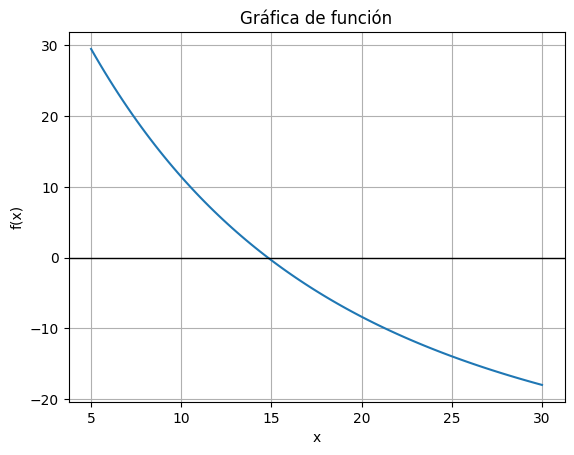

In [5]:
#Hago gráfica:
k = 100
x = np.linspace(5, 30, k)
y = np.zeros(k)

for i in range (k):
    y[i] = funcion(x[i])

plt.plot (x, y)
plt.grid()
plt.axhline(y=0,linewidth=1, c='k')
#plt.axvline(x=0,linewidth=1, c='k')
#plt.show()
plt.title("Gráfica de función")
plt.xlabel("x")
plt.ylabel("f(x)")

#Método de bisección
El método de bisección consiste en los siguientes pasos:

1. Se elige un valor bajo $x_l$ y valor alto $x_u$ en los cuales la función
  evaluada en esos puntos cambia de signo, es decir, $f(x_l)*f(x_u)<0$.

2. Se obtiene un valor medio dado por
   \begin{equation}
    x_r=\frac{x_l+x_u}{2}
   \end{equation}
3. Se hacen las siguientes evaluaciones para determinar en que subintervalos la raíz existe:

 a) Si $f(x_l)*f(x_r)<0$, la raíz existe en el subintervalo inferior. Así, se
asigna $x_u=x_r$ y se regresa al paso 2.

 b) Si $f(x_l)*f(x_r)>0$, la raiz existe en el subintervalo superior. Así, se asigna $x_l=x_r$ y se regresa al paso 2.

 c)  Si $f(x_l)*f(x_r)=0$ la raíz es igual a $x_r$, y termina el cálculo.   

In [6]:
def biseccion(x1, x2, xr, e):
    count = 0

    while abs(funcion(xr)) > e:
        count += 1
        xrold = xr
        xr = (x1 + x2)/2

        ea = abs((xr-xrold)/xr)*100

        test = funcion(x1)*funcion(xr)

        if test < 0:
            x2 = xr

        elif test > 0:
            x1 = xr
    return  count, xr, ea

#Método de la falsa posición
El método de la falsa posición es una alternativa más eficiente que el método de bisección. Consiste en utilizar triángulos semejantes, en los cuales la línea recta con el eje X se puede estimar como

\begin{equation}
    x_r=x_u-\frac{f(x_u)(x_l-x_u)}{f(x_l)-f(x_u)}
   \end{equation}

El valor calculado de $x_r$ calculado reemplaza cualquiera de los valores supuestos $x_l$ o $x_u$ hace produce el valor de una función con el mismo signo como $f(x_r)$. De esta manera, los valores de $x_l$ y $x_u$ siempre se acercan a la raiz real. El proceso se repite hasta que la raiz se estima adecuadamente. El algoritmo es el mismo que en el método de bisección, excepto que se usa la fórmula de arriba en el paso 2.

In [8]:
def falsa(x1, x2, xr, e):
    count = 0

    while abs(funcion(xr)) > e:
        count += 1
        xrold = xr
        xr = x2 - (funcion(x2)*(x1-x2) / ((funcion(x1) - funcion(x2))))

        ea = abs((xr-xrold)/xr)*100

        test = funcion(x1)*funcion(xr)

        if test < 0:
            x2 = xr

        elif test > 0:
            x1 = xr
    return  count, xr, ea

#Resultados utilizando librería roots
A continuación se muestran los resultados del código precedente y se compara con los elementos de la librería roots.

In [9]:
#Resultados utilizando x1= 12 y x2= 16 y una raíz con un f(x) permitido a 1e-6, denominado "e"
x1 = 12
x2 = 16
e = 1e-6
xr = (x1 + x2)/2

#Resultados de bisección:
raiz = biseccion(x1, x2, xr, e)

print ("RESULTADOS MÉTODO BISECCIÓN\n")
print ("Número de iteraciones es:  {}".format(raiz[0]))
print ("La raíz es: {:.9f} ".format(raiz[1]))
print("El error aproximado % es de: {:.9f} ".format(raiz[2]))
print ("La raíz evaluada es de: {:.9f} \n\n". format(funcion(raiz[1])))

#Resultados de la falsa posición:
xr2 = x2 - (funcion(x2)*(x1-x2) / (funcion(x1) - funcion(x2)))
raizp = falsa(x1, x2, xr2, e)

print ("RESULTADOS MÉTODO FALSA POSICIÓN \n")
print ("Número de iteraciones es:  {}".format(raizp[0]))
print ("La raíz es: {:.9f} ".format(raizp[1]))
print("El error aproximado % es de: {:.9f} ".format(raizp[2]))
print ("La raíz evaluada es de: {:.9f} \n\n". format(funcion(raizp[1])))

#Roots
sol= root_scalar(funcion, method='bisect', bracket=[x1,x2])
#print(sol)
print ("RESULTADOS MÉTODO BISECCIÓN CON ROOTS \n")
print("La raíz es: {:.9f}".format(sol.root))

RESULTADOS MÉTODO BISECCIÓN

Número de iteraciones es:  22
La raíz es: 14.801110268 
El error aproximado % es de: 0.000006443 
La raíz evaluada es de: -0.000000582 


RESULTADOS MÉTODO FALSA POSICIÓN 

Número de iteraciones es:  7
La raíz es: 14.801110168 
El error aproximado % es de: 0.000011169 
La raíz evaluada es de: -0.000000387 


RESULTADOS MÉTODO BISECCIÓN CON ROOTS 

La raíz es: 14.801109969
